# Custom YOLO V3

1. A custom yolo V3 model was trained on a seperate GPU machine to 900 epochs, we can train the model to further epochs to increase accuracy
2. This code imports model weight files and uses OpenCV to inference the code
3. We have used some sample images to test
4. We can extend this model to inference on video feeds

In [1]:
# import libraries 

import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# using matplotlib here for ploting and show image in output

def display_img(img,cmap=None):
    fig = plt.figure(figsize = (12,12))
    plt.axis(False)
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

## Load YOLOv3 architecture and pre-trained weight

In [3]:
labelsPath =(r"C:\Users\DELL\weapon detection inference\yolo_gun.names")
LABELS = open(labelsPath).read().strip().split("\n")
print("----Label to predict---",LABELS)

----Label to predict--- ['gun']


In [4]:
weightsPath = os.path.join(r"C:\Users\DELL\weapon detection inference\yolov3_900.weights")
configPath = os.path.join(r"C:\Users\DELL\weapon detection inference\yolov3_custom_train.cfg.txt")

In [5]:
# Loading the neural network framework Darknet (YOLO was created based on this framework)
net = cv2.dnn.readNetFromDarknet(configPath,weightsPath)


In [6]:
# Create the function which predict the frame input
def predict(image):
    
    # initialize a list of colors to represent each possible class label
    np.random.seed(42)
    COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
    (H, W) = image.shape[:2]
    
    # determine only the "ouput" layers name which we need from YOLO
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
    
    # construct a blob from the input image and then perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layerOutputs = net.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    threshold = 0.2
    
    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # extract the class ID and confidence (i.e., probability) of
            # the current object detection
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # filter out weak predictions by ensuring the detected
            # probability is greater than the minimum probability
            # confidence type=float, default=0.5
            if confidence > threshold:
                # scale the bounding box coordinates back relative to the
                # size of the image, keeping in mind that YOLO actually
                # returns the center (x, y)-coordinates of the bounding
                # box followed by the boxes' width and height
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # use the center (x, y)-coordinates to derive the top and
                # and left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # update our list of bounding box coordinates, confidences,
                # and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, threshold, 0.1)

    # ensure at least one detection exists
    if len(idxs) > 0:
        # loop over the indexes we are keeping
        for i in idxs.flatten():
            # extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # draw a bounding box rectangle and label on the image
            color = (255,0,0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = "{}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(image, text, (x +15, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                1, color, 2)
    return image

## Now let try to apply on images

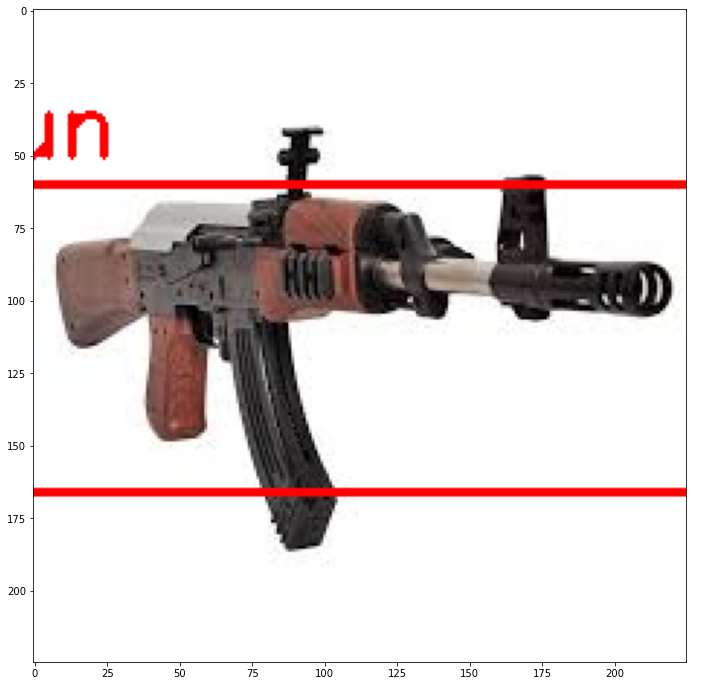

In [17]:
# Execute prediction on a single image
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/sample images/toy.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

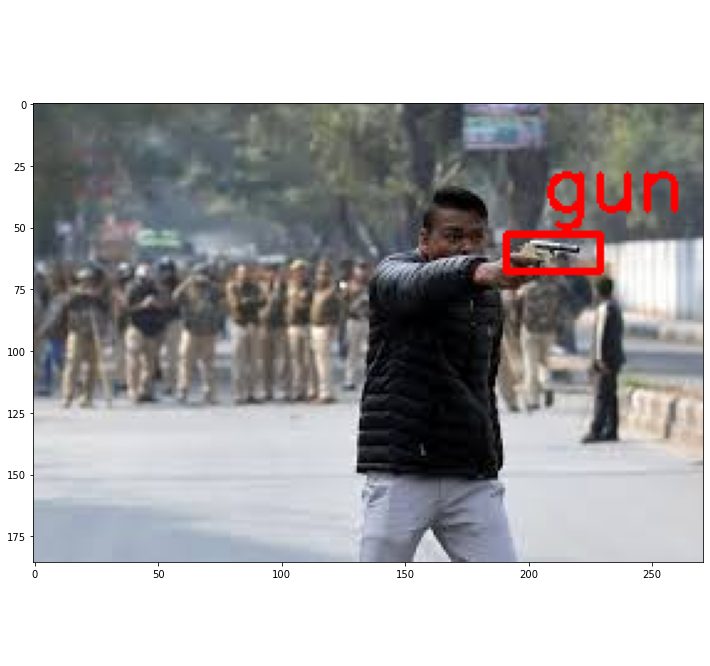

In [10]:
# Execute prediction on a single image
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/sample images/sample4.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

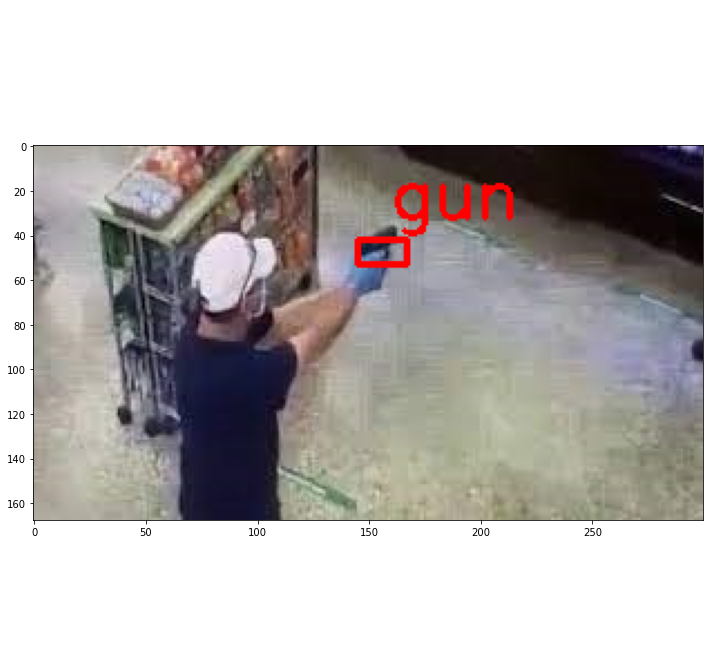

In [11]:
# Execute prediction on a single image
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/cctv_sample1.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

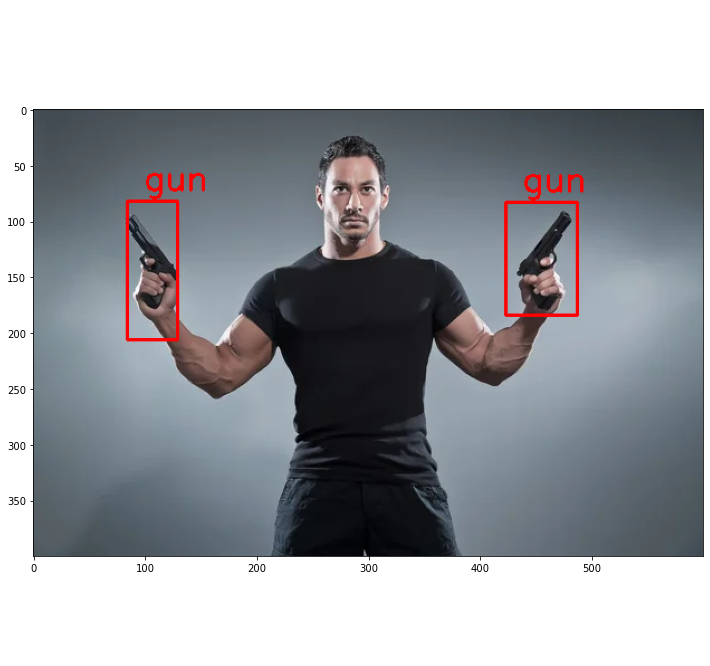

In [12]:
# Execute prediction on a single image
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/sample images/sample3.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

## weakness

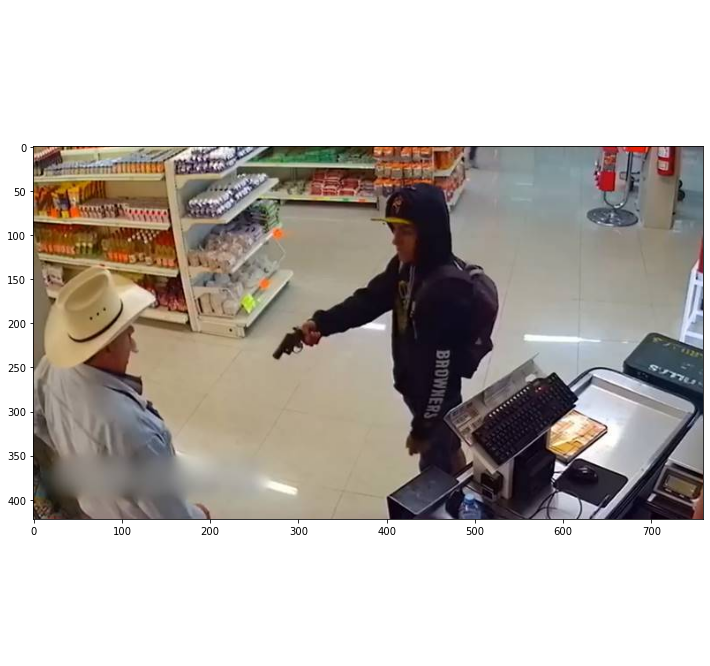

In [13]:
# Execute prediction on a single image
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/cctv_sample2.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

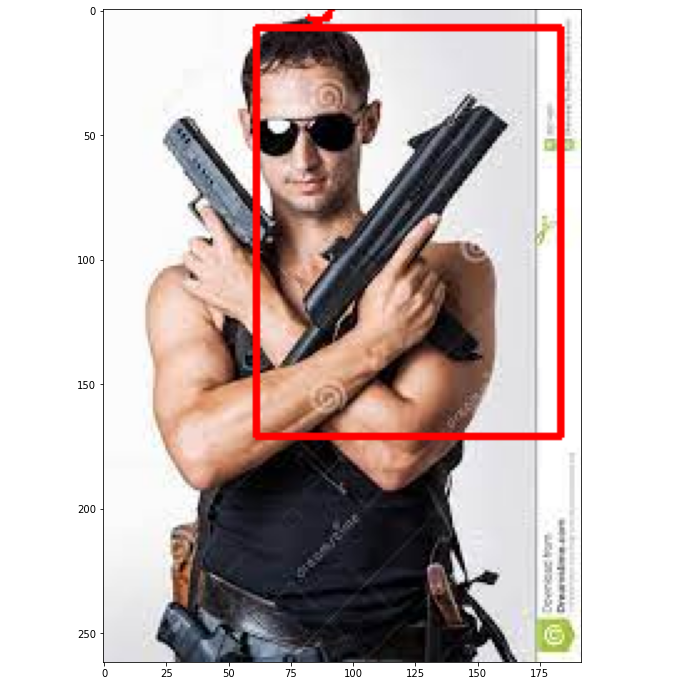

In [14]:
# Execute prediction on a single image
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/sample images/sample5.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))

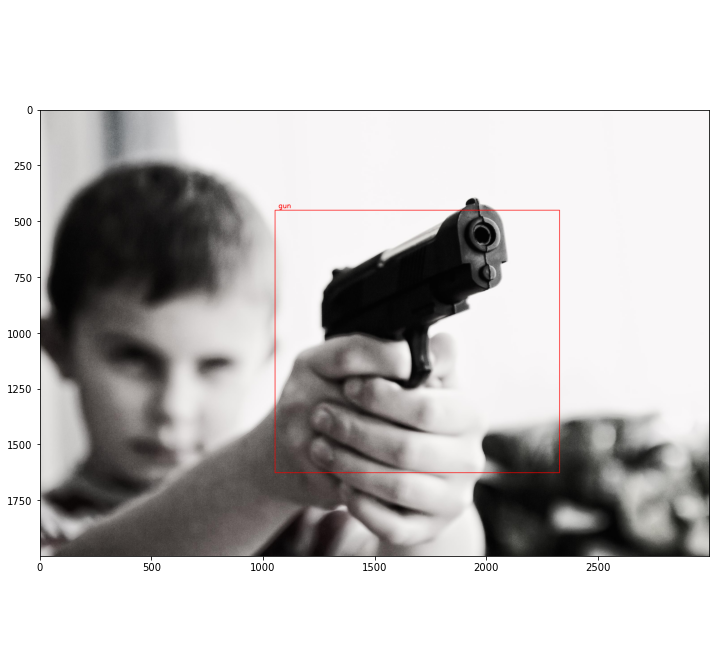

In [16]:
# Execute prediction on a single image
#img = cv2.imread(r"C:\Users\DELL\weapon detection inference/sample images/sample6.jpg")
img = cv2.imread(r"C:\Users\DELL\weapon detection inference/sample images/pexels-pixabay-52984.jpg")
#img = cv2.resize(img, (416, 416))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display_img(predict(img))